---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

## **1. Introduction**

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.


## **2. Problem Statement**
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.


## **3. Installing & Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score,roc_auc_score,classification_report

In [2]:
#pip install opendatasets

In [3]:
#import opendatasets

#### Download Data from Kaggle

In [4]:
#opendatasets.download("https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis")

#### Change Directory

In [5]:
os.chdir("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis")

## **4. Data Acquisition**

In [6]:
Train_Bene = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata.csv")
Test_Bene = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata.csv")

In [7]:
Train_Out = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata.csv")
Test_Out = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata.csv")

In [8]:
Train_Inp = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata.csv")
Test_Inp = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata.csv")

In [9]:
Train_Prov = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Train.csv")
Test_Prov = pd.read_csv("C:/Users/HP/Desktop/DS_satya/healthcare-provider-fraud-detection-analysis/Test.csv")

## **5. Data Description**

In [10]:
Train_Bene.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [11]:
Train_Out.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [12]:
Train_Inp.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [13]:
Train_Prov.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV56426,No
freq,1,4904


## **4.2 Data Information**

In [14]:
Train_Bene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [15]:
Train_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [16]:
Train_Inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [17]:
Train_Prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


## **5. Data Pre Processing**

## **6. Exploratory Data Analysis**

In [18]:
a=Train_Prov['PotentialFraud'].value_counts().to_frame()
#plt.slegend()
a=a.reset_index()
a.columns=['PotentialFraud','Number']

<AxesSubplot:xlabel='PotentialFraud', ylabel='Number'>

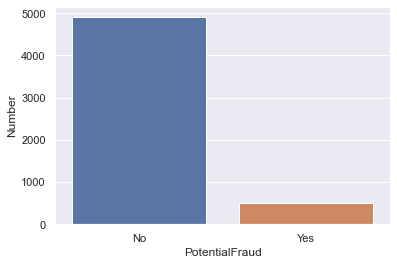

In [19]:
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.barplot(x='PotentialFraud',y='Number',data=a)

In [20]:
provider=Train_Prov.groupby('PotentialFraud',as_index=False)['Provider'].count()

<AxesSubplot:xlabel='PotentialFraud', ylabel='Provider'>

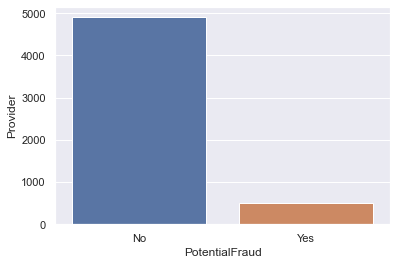

In [21]:
sns.barplot(x='PotentialFraud',y='Provider',data=provider)

In [22]:
gender=Train_Bene['Gender'].value_counts().to_frame()
gender=gender.reset_index()
gender.columns=['Gender','Total_count']
gender

,Gender,Total_count
0,2,79106
1,1,59450


<AxesSubplot:xlabel='Gender', ylabel='Total_count'>

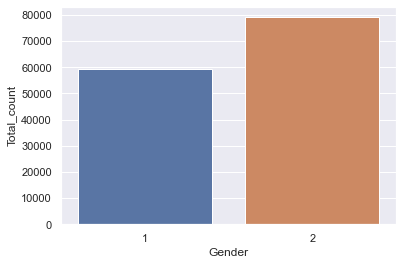

In [23]:
sns.barplot(x='Gender',y='Total_count',data=gender)

In [24]:
state_wise = Train_Bene.groupby('State', as_index=False)['BeneID'].count().sort_values(ascending=False,by='BeneID').head(20)

<AxesSubplot:xlabel='State', ylabel='BeneID'>

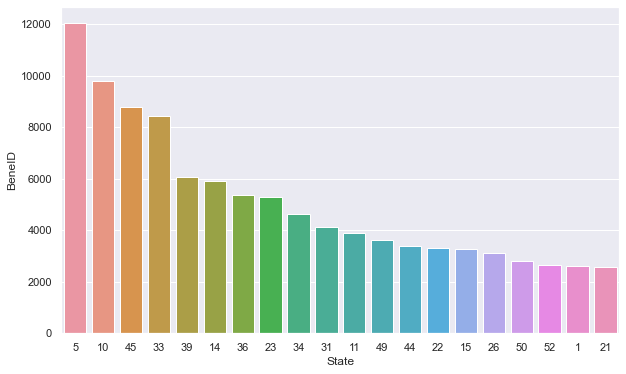

In [25]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.barplot(x='State',y='BeneID',data=state_wise,order=state_wise.sort_values('BeneID',ascending=False).State)

In [26]:
# top 20 beneficiary count Country Wise

In [27]:
country_wise = Train_Bene.groupby('State',as_index=False)['BeneID'].count().sort_values(ascending=False,by='BeneID').head(20)

Text(0, 0.5, 'Country Count')

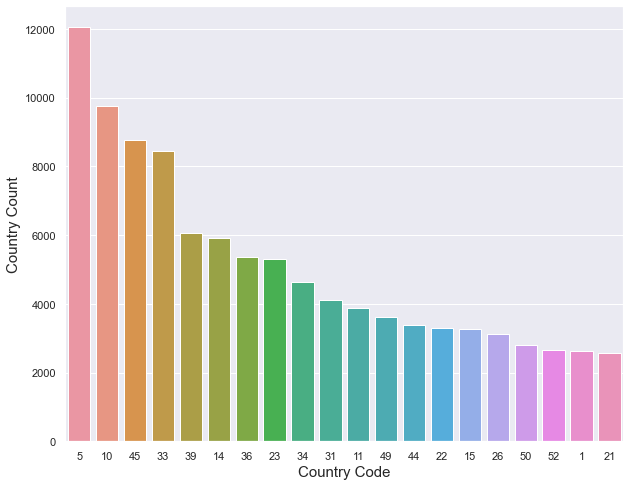

In [28]:
plt.figure(figsize=(10,8))
import seaborn as sns
sns.barplot(x='State',y='BeneID',data=country_wise,order=country_wise.sort_values('BeneID',ascending=False).State)
plt.xlabel('Country Code',size=15)
plt.ylabel('Country Count', size = 15)

In [29]:
# Distrubtion of Race

Text(0, 0.5, 'Race Count')

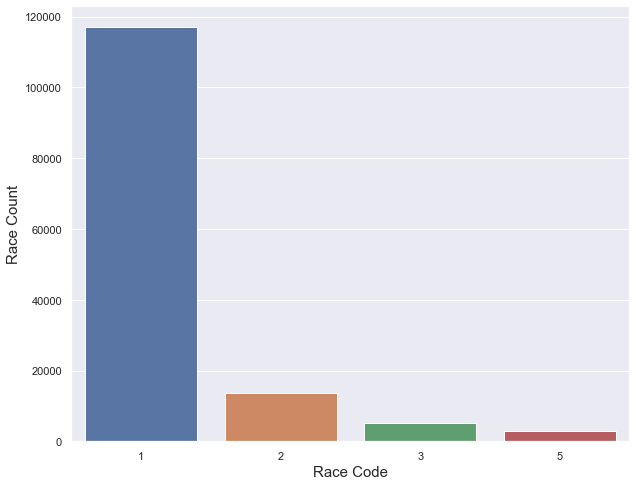

In [30]:
race_wise = Train_Bene.groupby('Race',as_index=False)['BeneID'].count().sort_values(ascending=False,by='BeneID').head(20)
plt.figure(figsize=(10,8))
import seaborn as sns
sns.barplot(x='Race',y='BeneID',data=race_wise,order=race_wise.sort_values('BeneID',ascending=False).Race)
plt.xlabel('Race Code',size=15)
plt.ylabel('Race Count', size = 15)

In [31]:
Train_Out=Train_Out[Train_Out['InscClaimAmtReimbursed']<3500]

In [32]:
Train_Inp=Train_Inp[Train_Inp['InscClaimAmtReimbursed']<60000]

<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='Density'>

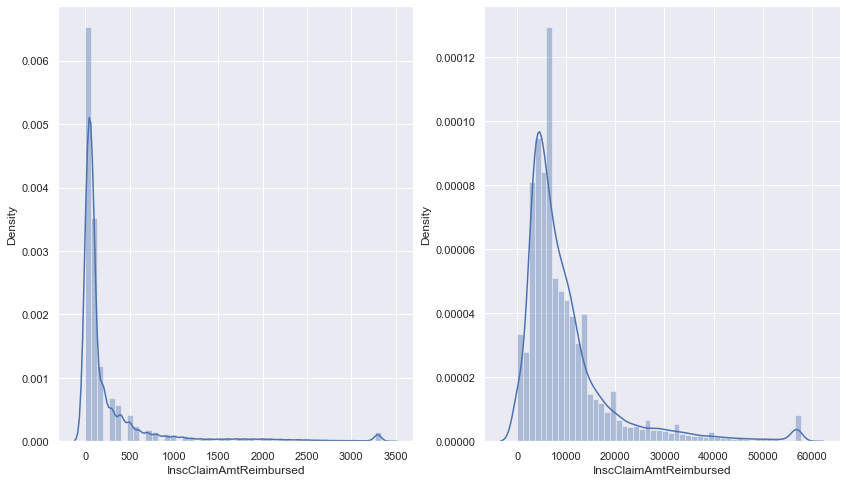

In [33]:
fig, axs = plt.subplots(figsize=(14,8),ncols=2)
import seaborn as sns

x=Train_Out['InscClaimAmtReimbursed']
y=Train_Inp['InscClaimAmtReimbursed']
sns.distplot(x,ax=axs[0])
sns.distplot(y,ax=axs[1])

## **7. Data Post Processing**

In [34]:
len(Train_Out['BeneID'].unique())

133944

In [35]:
Train_Bene.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70


In [36]:
Train_Inp.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Train_Out.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409


In [38]:
Train_Prov.head(1)

,Provider,PotentialFraud
0,PRV51001,No


In [39]:
common_columns = [ idx for idx in Train_Out.columns if idx in Train_Inp.columns]
print(common_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']


In [40]:
common_columns1 = [ idx for idx in Test_Out.columns if idx in Test_Inp.columns]
print(common_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']


In [41]:
Inp_Out_Merge = pd.merge(Train_Inp, Train_Out, left_on = common_columns, right_on = common_columns,how = 'outer')
Inp_Out_Merge_Test = pd.merge(Test_Inp, Test_Out, left_on = common_columns1, right_on = common_columns,how = 'outer')

In [42]:
Inp_Out_Bene_Merge = pd.merge(Inp_Out_Merge, Train_Bene, left_on = 'BeneID', right_on = 'BeneID', how = 'inner')
Inp_Out_Bene_Merge_Test = pd.merge(Inp_Out_Merge_Test, Test_Bene, left_on = 'BeneID', right_on = 'BeneID', how = 'inner')

In [43]:
Final_DS = pd.merge(Inp_Out_Bene_Merge, Train_Prov, left_on = 'Provider', right_on='Provider', how='inner')
Final_DS_Test = pd.merge(Inp_Out_Bene_Merge_Test, Test_Prov, left_on = 'Provider', right_on='Provider', how='inner')

In [44]:
Final_DS.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes


In [45]:
Final_DS['Total_Annual_Reim'] = Final_DS['IPAnnualReimbursementAmt']+Final_DS['OPAnnualReimbursementAmt']
Final_DS_Test['Total_Annual_Reim'] = Final_DS_Test['IPAnnualReimbursementAmt']+Final_DS_Test['OPAnnualReimbursementAmt']

In [46]:
Final_DS['Total_Annual_Ded'] = Final_DS['IPAnnualDeductibleAmt']+Final_DS['OPAnnualDeductibleAmt']
Final_DS_Test['Total_Annual_Ded'] = Final_DS_Test['IPAnnualDeductibleAmt']+Final_DS_Test['OPAnnualDeductibleAmt']

In [47]:
Final_DS['ClaimStartDt']=pd.to_datetime(Final_DS['ClaimStartDt'])
Final_DS_Test['ClaimStartDt']=pd.to_datetime(Final_DS_Test['ClaimStartDt'])

In [48]:
Final_DS['ClaimEndDt']=pd.to_datetime(Final_DS['ClaimEndDt'])
Final_DS_Test['ClaimEndDt']=pd.to_datetime(Final_DS_Test['ClaimEndDt'])

In [49]:
Final_DS['AdmissionDt']=pd.to_datetime(Final_DS['AdmissionDt'])
Final_DS_Test['AdmissionDt']=pd.to_datetime(Final_DS_Test['AdmissionDt'])

In [50]:
Final_DS['DischargeDt']=pd.to_datetime(Final_DS['DischargeDt'])
Final_DS_Test['DischargeDt']=pd.to_datetime(Final_DS_Test['DischargeDt'])

In [51]:
Final_DS['DOB']=pd.to_datetime(Final_DS['DOB'])
Final_DS_Test['DOB']=pd.to_datetime(Final_DS_Test['DOB'])

In [52]:
Final_DS['DOD']=pd.to_datetime(Final_DS['DOD'])
Final_DS_Test['DOD']=pd.to_datetime(Final_DS_Test['DOD'])

In [53]:
Final_DS['Claim_Period']=Final_DS['ClaimEndDt']-Final_DS['ClaimStartDt']
Final_DS['Claim_Period']=Final_DS['Claim_Period']/np.timedelta64(1,'D')

#TEst
Final_DS_Test['Claim_Period']=Final_DS_Test['ClaimEndDt']-Final_DS_Test['ClaimStartDt']
Final_DS_Test['Claim_Period']=Final_DS_Test['Claim_Period']/np.timedelta64(1,'D')

In [54]:
Final_DS.sort_values(by='ClaimEndDt')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Total_Annual_Reim,Total_Annual_Ded,Claim_Period
15051,BENE120656,CLM31907,2009-01-01,2009-01-01,PRV56575,0,PHY353156,PHY353156,NaN,2009-01-01,73313,1068.0,2009-01-01,550,8054,78833,V4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8166.0,NaN,NaN,NaN,NaN,NaN,1929-08-01,NaT,2,1,0,45,910,12,12,2,2,2,2,2,2,2,2,2,2,2,50,1068,150,40,Yes,200,1108,0.0
397494,BENE129615,CLM113296,2009-01-01,2009-01-01,PRV51366,20,NaN,NaN,NaN,NaT,NaN,0.0,NaT,NaN,V5481,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952-10-01,NaT,2,1,Y,5,500,12,12,1,1,1,1,1,1,1,1,2,2,2,4000,1068,1560,670,No,5560,1738,0.0
100533,BENE140016,CLM31456,2008-12-28,2009-01-01,PRV51064,3000,PHY341974,NaN,PHY311075,2008-12-28,7802,1068.0,2009-01-01,227,7802,41401,25000,41400,28981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947-08-01,NaT,1,1,0,1,470,12,12,2,2,1,2,2,2,1,1,2,1,2,3040,1068,60,200,Yes,3100,1268,4.0
269322,BENE106035,CLM113152,2009-01-01,2009-01-01,PRV51567,10,PHY350277,NaN,NaN,NaT,NaN,0.0,NaT,NaN,4111,4279,V4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-10-01,NaT,1,1,0,5,400,12,12,2,1,1,2,1,2,1,1,1,1,2,11020,8136,5110,440,Yes,16130,8576,0.0
360091,BENE129827,CLM114233,2009-01-01,2009-01-01,PRV52365,20,PHY416432,NaN,NaN,NaT,78039,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953-11-01,NaT,2,2,0,11,280,12,12,1,1,2,2,2,1,2,1,2,1,2,8030,2136,3250,1250,No,11280,3386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,BENE145367,CLM752141,2009-12-30,2009-12-31,PRV54075,50,PHY338170,NaN,NaN,NaT,NaN,0.0,NaT,NaN,4011,3004,60090,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929-10-01,NaT,1,1,0,24,540,12,12,2,2,2,2,2,1,2,2,2,2,2,0,0,50,10,Yes,50,10,1.0
247652,BENE89349,CLM753253,2009-12-31,2009-12-31,PRV52889,60,PHY333932,NaN,NaN,NaT,NaN,0.0,NaT,NaN,29660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,2,1,0,15,330,12,12,1,1,2,2,2,1,2,1,2,2,2,0,0,2200,400,No,2200,400,0.0
102754,BENE143733,CLM753491,2009-12-31,2009-12-31,PRV56345,10,PHY403331,NaN,NaN,NaT,NaN,0.0,NaT,NaN,43410,72887,71590,4279,71949,042,3310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964-12-01,NaT,2,1,0,43,490,12,12,1,2,2,2,2,1,1,2,2,2,1,0,0,440,590,No,440,590,0.0
81966,BENE62583,CLM80611,2009-12-24,2009-12-31,PRV51948,13000,PHY361948,NaN,NaN,2009-12-24,78609,1068.0,2009-12-31,252,41071,51881,2768,41091,40491,73016,41401,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-10-01,NaT,2,1,0,7,10,12,12,2,1,2,2,2,2,1,1,2,1,2,13000,1068,90,10,Yes,13090,1078,7.0


In [55]:
Final_DS['DOD'].isnull().sum()

553455

In [56]:
datestamp=pd.to_datetime('31/12/2009',format = '%d/%m/%Y')

In [57]:
Final_DS['DOD']=Final_DS['DOD'].fillna(datestamp)
#TEst
Final_DS_Test['DOD']=Final_DS_Test['DOD'].fillna(datestamp)

In [58]:
Final_DS['DOD'].isnull().sum()

0

In [59]:
Final_DS['Patient_Age']=Final_DS['DOD']-Final_DS['DOB']
Final_DS['Patient_Age']=Final_DS['Patient_Age']/np.timedelta64(1,'Y')
#Test
Final_DS_Test['Patient_Age']=Final_DS_Test['DOD']-Final_DS_Test['DOB']
Final_DS_Test['Patient_Age']=Final_DS_Test['Patient_Age']/np.timedelta64(1,'Y')

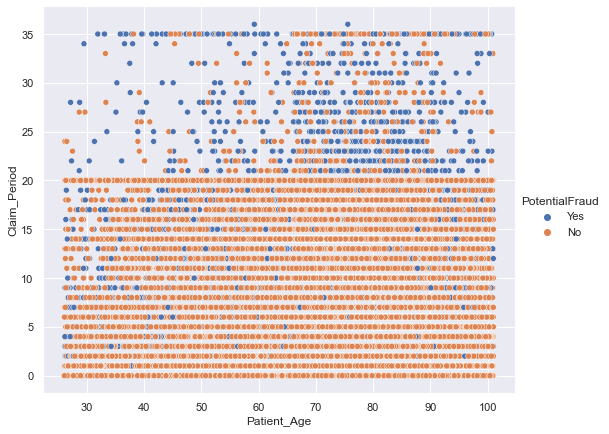

In [60]:
sns.relplot(data=Final_DS, x='Patient_Age', y='Claim_Period', kind='scatter',
            height=6, aspect=1.2, hue='PotentialFraud')

In [61]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','DischargeDt','DiagnosisGroupCode','DOB', 'DOD']


In [62]:
Final_DS.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Total_Annual_Reim,Total_Annual_Ded,Claim_Period,Patient_Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,2009-12-31,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,36060,3274,6.0,66.999322


In [63]:
Final_DS.drop(columns=remove_columns, axis=1,inplace=True)
#Test
Final_DS_Test.drop(columns=remove_columns, axis=1,inplace=True)

## **7. Data Post-Processing**

### One Hot Coding

In [64]:
Final_DS.Gender=Final_DS.Gender.astype('category')
Final_DS_Test.Gender=Final_DS_Test.Gender.astype('category')

Final_DS.Race=Final_DS.Race.astype('category')
Final_DS_Test.Race=Final_DS_Test.Race.astype('category')

# Do one hot encoding for gender and Race
Final_DS=pd.get_dummies(Final_DS,columns=['Gender','Race'])
Final_DS_Test=pd.get_dummies(Final_DS_Test,columns=['Gender','Race'])

In [65]:
Final_DS = Final_DS.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_DS_Test = Final_DS_Test.groupby(['Provider'],as_index=False).agg('sum')

In [66]:
X= Final_DS.loc[ : , Final_DS.columns != 'PotentialFraud']
y=Final_DS['PotentialFraud']

In [67]:
X=X.loc[:,X.columns != 'Provider']

### **7.2 Data Scaling**

In [68]:
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X = standard_scaler.transform(X)
# x_test_std = standard_scaler.transform(x_test)

### **7.3 Data Preparation**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4328, 31)
y_train shape:  (4328,)
X_test shape:  (1082, 31)
y_test shape:  (1082,)


## **8. Model Development & Evaluation**

In [70]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [71]:
y_train_pred_count = clf.predict(X_train)
y_test_pred_count = clf.predict(X_test)

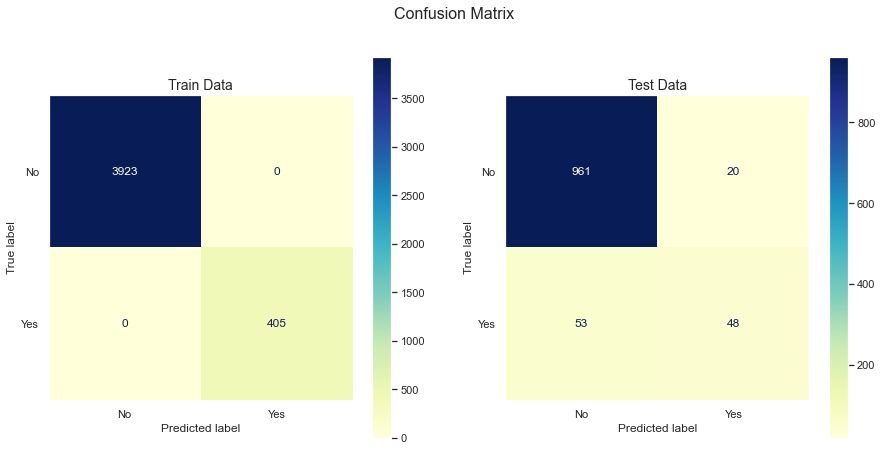

In [72]:
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

## **8. Model Run on live Data**

In [73]:
Final_DS_Test_X=Final_DS_Test.loc[:,Final_DS_Test.columns != 'Provider']

In [74]:
Final_DS_Test_X

,InscClaimAmtReimbursed,DeductibleAmtPaid,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Total_Annual_Reim,Total_Annual_Ded,Claim_Period,Patient_Age,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,53790,380.0,1578,58010,2424,2460,331,302,338,385,346,319,263,259,349,356,391,1062090,112392,480740,138980,1542830,251372,201.0,14842.084369,71.0,134.0,169.0,30.0,2.0,4.0
1,30720,0.0,112,31220,1224,1224,169,135,154,189,167,151,132,126,178,188,196,384290,48924,244970,61800,629260,110724,213.0,7633.451748,43.0,59.0,76.0,26.0,0.0,0.0
2,27230,1238.0,39,14130,468,468,70,61,59,77,63,65,49,47,58,74,75,117160,9612,95200,25210,212360,34822,101.0,2716.885357,16.0,23.0,33.0,6.0,0.0,0.0
3,64580,5340.0,38,7910,444,444,55,53,57,69,63,58,48,48,62,66,71,200200,20292,67480,25230,267680,45522,45.0,2862.569389,23.0,15.0,37.0,1.0,0.0,0.0
4,61620,670.0,217,55200,2232,2276,307,271,287,355,319,294,234,245,323,336,367,900400,101460,534460,156960,1434860,258420,264.0,13950.731363,66.0,124.0,145.0,45.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,860,0.0,495,9250,132,132,16,15,17,21,19,16,17,15,18,20,22,5000,1068,15710,5510,20710,6578,15.0,869.091083,7.0,4.0,8.0,0.0,2.0,1.0
1349,1590,0.0,360,3180,96,96,12,11,13,15,14,11,10,8,13,12,16,105000,2136,21210,9010,126210,11146,0.0,541.681212,5.0,3.0,6.0,2.0,0.0,0.0
1350,510,0.0,90,1892,24,24,3,2,2,3,3,4,3,2,4,3,4,20060,2136,7430,1420,27490,3556,0.0,154.163330,1.0,1.0,2.0,0.0,0.0,0.0
1351,9980,370.0,2205,23520,588,564,80,76,78,92,88,80,70,65,86,85,94,172930,17088,85060,24780,257990,41868,3.0,3511.623100,18.0,31.0,32.0,10.0,5.0,2.0


In [75]:
Final_DS_Test_X = standard_scaler.transform(Final_DS_Test_X)

In [76]:
Final_DS_Test_X_pred_count = clf.predict(Final_DS_Test_X)

In [77]:
Final_DS_Test_X_pred_count=pd.Series(Final_DS_Test_X_pred_count)

In [78]:
Final_Pred= pd.concat([Final_DS_Test['Provider'], Final_DS_Test_X_pred_count], axis=1)

In [79]:
Final_Pred

,Provider,0
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
...,...,...
1348,PRV57713,No
1349,PRV57726,No
1350,PRV57745,No
1351,PRV57749,No


In [80]:
Final_Pred.rename(columns={0:'Potential_Fraud'},inplace=True)

In [81]:
Final_Pred['Potential_Fraud'].value_counts()

No     1288
Yes      65
Name: Potential_Fraud, dtype: int64

## Conclusion

patient’s age less than 60 years and total claim period more than 20 years, the probability of the transaction is fraudulent is high.

In [82]:
Final_Pred

,Provider,Potential_Fraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No
...,...,...
1348,PRV57713,No
1349,PRV57726,No
1350,PRV57745,No
1351,PRV57749,No


In [83]:
Fraud_Analysis=Final_Pred['Potential_Fraud'].value_counts().to_frame()
Fraud_Analysis=Fraud_Analysis.reset_index()
Fraud_Analysis

,index,Potential_Fraud
0,No,1288
1,Yes,65


<AxesSubplot:xlabel='index', ylabel='Potential_Fraud'>

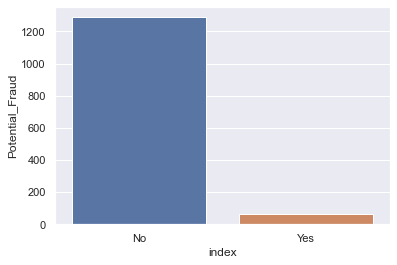

In [84]:
sns.set_theme(style='darkgrid')
sns.barplot(x='index',y='Potential_Fraud',data=Fraud_Analysis)